# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [1]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [3]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [4]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [5]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [6]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [7]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [8]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [9]:
print(vec[1:3])

[1.36363636 1.72727273]


In [10]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [11]:
np.random.seed(123)

生成均匀分布随机数：

In [12]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


正态分布随机数：

In [14]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[-0.76943347  0.57674602  0.12652592 -1.30148897  2.20742744]
 [ 0.52274247  0.46564476  0.72491523  1.49582653  0.74658059]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [15]:
print(np.exp(norm))

[[0.46327545 1.78023615 1.13487887 0.2721263  9.09229576]
 [1.68664689 1.59304098 2.06455607 4.46302383 2.10977349]]


In [16]:
print(np.log(unif))

[-0.36173173 -1.2512764  -1.48345987 -0.59544936 -0.32924188]


也可以对向量和矩阵进行汇总：

In [17]:
np.sum(unif)

2.4802437129808985

In [18]:
np.mean(norm)

0.47954864986966317

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [19]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([-0.1233455 ,  0.52119539,  0.42572057,  0.09716878,  1.47700401])

In [20]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.4732474 , 0.13618775])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [2]:
import numpy as np
np.random.seed(123)
x = np.random.uniform(low=0.0, high=1.0, size=10000)
print(x[:10])


[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [3]:
y = -np.log(x)
print(y[-10:])

[1.13410426 1.86024285 0.80680447 1.67802918 0.63341567 1.03629983
 0.53604049 0.0149665  1.51112261 0.48890569]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

(array([11.,  5.,  5., ...,  0.,  0.,  1.]),
 array([1.09941497e-04, 1.06976885e-03, 2.02959620e-03, ...,
        9.59646379e+00, 9.59742362e+00, 9.59838344e+00]),
 <BarContainer object of 10000 artists>)

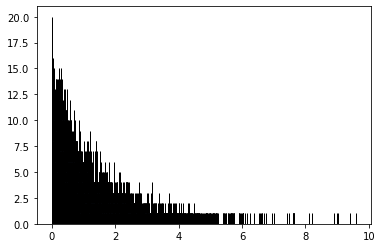

In [5]:
import matplotlib.pyplot as plt
plt.hist(y, bins = 10000, color = 'steelblue', edgecolor = 'black' )

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

y服从参数为1的指数分布
因为y的可能取值区间为（0，+无穷），且y=-log(x)在区间（0,1）上为严格单调减函数，其反函数为x= h(y)=e^(-y),求导为-e^(-y),所以y=-log(x)的密度函数为e^(-y),y>0,即参数为1的指数分布。

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [55]:
def sigmoid(x):
    print(np.exp(x)/(1+np.exp(x)))
    return

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [57]:
x = np.array([-1000,-100,-10,0,10,100,1000])
sigmoid(x)

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00            nan]


<ipython-input-55-c64e24ee4a24>:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(x)/(1+np.exp(x)))
<ipython-input-55-c64e24ee4a24>:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(x)/(1+np.exp(x)))


(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

我认为可能的原因是向量x中有绝对值较大的数，传给sigmoid函数时，np.exp(x)非常大，导致这一指数函数溢出。sigmoid函数真实的取值范围是（0,1），
分子的取值范围是（0，正无穷），分母的取值范围是（1，正无穷），可以把sigmoid函数的表达式等价变换为1/（1+exp（-x））,但这样当x为非常大的负值时也会出问题，可以定义一个变量，先算出e^-|x|,用1+e^-|x|作为分母，当x>0时，分子为1；当x<0时，分子为e^x。可以用函数np.where(c,a,b),c为x>0，a=1,b=e^x,从而可以避免循环

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [39]:
def sigmoid(x):
    y =[]
    for i in range(len(x)):
        if x[i]>=0:
            y.append(1/(1+np.exp(-x[i])))
        else:
            y.append(np.exp(x[i])/(1+np.exp(x[i])))
    return np.array(y)
print(sigmoid(x))

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00 1.00000000e+00]


In [47]:
def sigmoid(x):
    z = np.exp(-abs(x))+1
    res = np.where(x>0,1,np.exp(x))/z
    return res
sigmoid(x)

#参考了https://www.pythonheidong.com/blog/article/409614/7621b818f7f6a911cca0/中的内容

<ipython-input-47-92d4804af163>:3: RuntimeWarning: overflow encountered in exp
  res = np.where(x>0,1,np.exp(x))/z


array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [42]:
def softplus(x):
    return np.log(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [43]:
x = np.array([-1000,-100,-10,0,10,100,1000])
softplus(x)

<ipython-input-42-57c121eb77c1>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(x))


array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02,            inf])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

出现了警告：指数函数的溢出
可能的原因是向量x中有绝对值较大的数，传给softplus函数时，np.exp(x)非常大，导致这一指数函数溢出。softplus函数真实的取值范围是（0,正无穷），可以把softplus函数的表达式等价变换为log(1+exp(x))= log(1+exp(-x)) + x,当x<0时，用log(1+e^x);当x>0时，用log(1+exp(-x)) + x 用np.maximum

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [44]:
def softplusnew(x):
    y =[]
    for i in range(len(x)):
        if x[i]>=0:
            y.append(np.log(1 + np.exp(-x[i]))+ x[i])
        else:
            y.append(np.log(1+np.exp(x[i])))
    return np.array(y)
print(softplusnew(x))
#参考了https://www.cnpython.com/qa/141326中的方法

[0.00000000e+00 0.00000000e+00 4.53988992e-05 6.93147181e-01
 1.00000454e+01 1.00000000e+02 1.00000000e+03]


In [46]:
def softplus(x):
    res = np.where(x>0,np.log(1+np.exp(-x))+x,np.log(1+np.exp(x)))
    return res
softplus(x)

<ipython-input-46-44d9625cbd3b>:2: RuntimeWarning: overflow encountered in exp
  res = np.where(x>0,np.log(1+np.exp(-x))+x,np.log(1+np.exp(x)))


array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])